In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Original Data

## Tables

### Profit by Groups

In [2]:
# 3 Groups
profit3_df = pd.DataFrame({"Small (<20)": {"Current": 9.07, "First-Degree PD": 18.35, "Linear": 9.15, "Nonlinear": 9.57},
              "Medium (20-49)": {"Current": 4.81, "First-Degree PD": 10.50, "Linear": 5.15, "Nonlinear": 5.65},
              "Large (≥50)": {"Current": 4.38, "First-Degree PD": 9.93, "Linear": 4.41, "Nonlinear": 4.98}})
profit3_df["Total"] = profit3_df.sum(axis=1)
profit3_df

,Small (<20),Medium (20-49),Large (≥50),Total
Current,9.07,4.81,4.38,18.26
First-Degree PD,18.35,10.50,9.93,38.78
Linear,9.15,5.15,4.41,18.71
Nonlinear,9.57,5.65,4.98,20.20


In [3]:
print(profit3_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Small (<20) &  Medium (20-49) &  Large (≥50) &  Total \\
\midrule
Current         &         9.07 &            4.81 &         4.38 &  18.26 \\
First-Degree PD &        18.35 &           10.50 &         9.93 &  38.78 \\
Linear          &         9.15 &            5.15 &         4.41 &  18.71 \\
Nonlinear       &         9.57 &            5.65 &         4.98 &  20.20 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_19632\147725666.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(profit3_df.to_latex())


In [4]:
# 5 groups
profit5_df = pd.DataFrame({"Group1 (<10)": {"Current": 4.82, "First-Degree PD": 10.47, "Linear": 4.71, "Nonlinear": 5.09},
              "Group2 (10-19)": {"Current": 4.25, "First-Degree PD": 7.88, "Linear": 4.44, "Nonlinear": 4.48},
              "Group3 (20-49)": {"Current": 4.81, "First-Degree PD": 10.50, "Linear": 5.15, "Nonlinear": 5.65},
              "Group4 (50-99)": {"Current": 2.22, "First-Degree PD": 4.66, "Linear": 2.26, "Nonlinear": 2.64},
              "Group5 (≥100)": {"Current": 2.16, "First-Degree PD": 5.27, "Linear": 2.15, "Nonlinear": 2.33}})
profit5_df["Total"] = profit5_df.sum(axis=1)
profit5_df

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Current,4.82,4.25,4.81,2.22,2.16,18.26
First-Degree PD,10.47,7.88,10.50,4.66,5.27,38.78
Linear,4.71,4.44,5.15,2.26,2.15,18.71
Nonlinear,5.09,4.48,5.65,2.64,2.33,20.19


In [5]:
print(profit5_df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Group1 (<10) &  Group2 (10-19) &  Group3 (20-49) &  Group4 (50-99) &  Group5 (≥100) &  Total \\
\midrule
Current         &          4.82 &            4.25 &            4.81 &            2.22 &           2.16 &  18.26 \\
First-Degree PD &         10.47 &            7.88 &           10.50 &            4.66 &           5.27 &  38.78 \\
Linear          &          4.71 &            4.44 &            5.15 &            2.26 &           2.15 &  18.71 \\
Nonlinear       &          5.09 &            4.48 &            5.65 &            2.64 &           2.33 &  20.19 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_19632\3227267008.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(profit5_df.to_latex())


### Consumer Welfare by Groups

In [6]:
cs_df = pd.DataFrame({"Group1 (<10)": {"Current": 1.99, "First-Degree PD": 0, "Linear": 4.31, "Nonlinear": 2.86},
              "Group2 (10-19)": {"Current": 1.61, "First-Degree PD": 0, "Linear": 2.47, "Nonlinear": 2.22},
              "Group3 (20-49)": {"Current": 1.51, "First-Degree PD": 0, "Linear": 1.84, "Nonlinear": 2.83},
              "Group4 (50-99)": {"Current": 0.72, "First-Degree PD": 0, "Linear": 0.73, "Nonlinear": 1.16},
              "Group5 (≥100)": {"Current": 0.87, "First-Degree PD": 0, "Linear": 0.75, "Nonlinear": 1.12}})
cs_df["Total"] = cs_df.sum(axis=1)
cs_df

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Current,1.99,1.61,1.51,0.72,0.87,6.70
First-Degree PD,0.00,0.00,0.00,0.00,0.00,0.00
Linear,4.31,2.47,1.84,0.73,0.75,10.10
Nonlinear,2.86,2.22,2.83,1.16,1.12,10.19


In [7]:
print(cs_df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Group1 (<10) &  Group2 (10-19) &  Group3 (20-49) &  Group4 (50-99) &  Group5 (≥100) &  Total \\
\midrule
Current         &          1.99 &            1.61 &            1.51 &            0.72 &           0.87 &   6.70 \\
First-Degree PD &          0.00 &            0.00 &            0.00 &            0.00 &           0.00 &   0.00 \\
Linear          &          4.31 &            2.47 &            1.84 &            0.73 &           0.75 &  10.10 \\
Nonlinear       &          2.86 &            2.22 &            2.83 &            1.16 &           1.12 &  10.19 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_19632\2609820234.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(cs_df.to_latex())


### Social Welfare by Groups

In [8]:
sw_df = profit5_df + cs_df
sw_df

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Current,6.81,5.86,6.32,2.94,3.03,24.96
First-Degree PD,10.47,7.88,10.50,4.66,5.27,38.78
Linear,9.02,6.91,6.99,2.99,2.90,28.81
Nonlinear,7.95,6.70,8.48,3.80,3.45,30.38


In [9]:
print(sw_df.to_latex())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19632\4214689937.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sw_df.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
{} &  Group1 (<10) &  Group2 (10-19) &  Group3 (20-49) &  Group4 (50-99) &  Group5 (≥100) &  Total \\
\midrule
Current         &          6.81 &            5.86 &            6.32 &            2.94 &           3.03 &  24.96 \\
First-Degree PD &         10.47 &            7.88 &           10.50 &            4.66 &           5.27 &  38.78 \\
Linear          &          9.02 &            6.91 &            6.99 &            2.99 &           2.90 &  28.81 \\
Nonlinear       &          7.95 &            6.70 &            8.48 &            3.80 &           3.45 &  30.38 \\
\bottomrule
\end{tabular}



## Graphs

In [10]:
for Type, df in {"Profit": profit5_df, "Consumer Welfare": cs_df, "Social Welfare": sw_df}.items():
    df.reset_index(names="Method", inplace=True)
    df["Type"] = Type

In [17]:
# Create dataframe for visualization
welfare_df = (pd.concat([profit5_df, cs_df, sw_df])
                .melt(id_vars=["Method", "Type", "Total"],
                      var_name="Group",
                      value_name="Value"))
welfare_df.head()

,Method,Type,Total,Group,Value
0,Current,Profit,18.26,Group1 (<10),4.82
1,First-Degree PD,Profit,38.78,Group1 (<10),10.47
2,Linear,Profit,18.71,Group1 (<10),4.71
3,Nonlinear,Profit,20.19,Group1 (<10),5.09
4,Current,Consumer Welfare,6.70,Group1 (<10),1.99


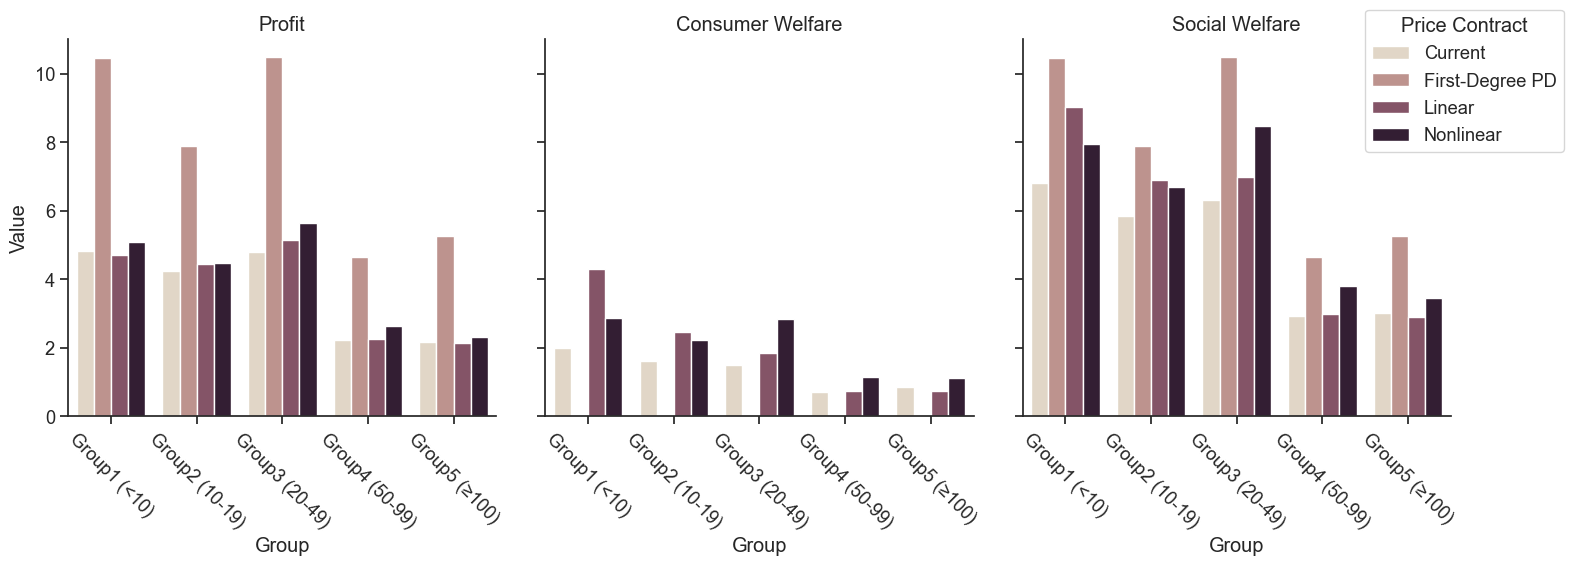

In [112]:
# Barplot
sns.set(font_scale=1.2)
sns.set_style("ticks")
bar = (sns.catplot(data=welfare_df,
            x="Group", y="Value", hue="Method",
            col="Type", kind="bar",
            palette="ch:.25",
            legend=False)
   .set_titles(col_template="{col_name}")
   .set_xticklabels(rotation=-45))

plt.legend(loc=(0.8, 0.7), title="Price Contract");

bar.savefig("fig/groups_bar.svg", dpi=400)

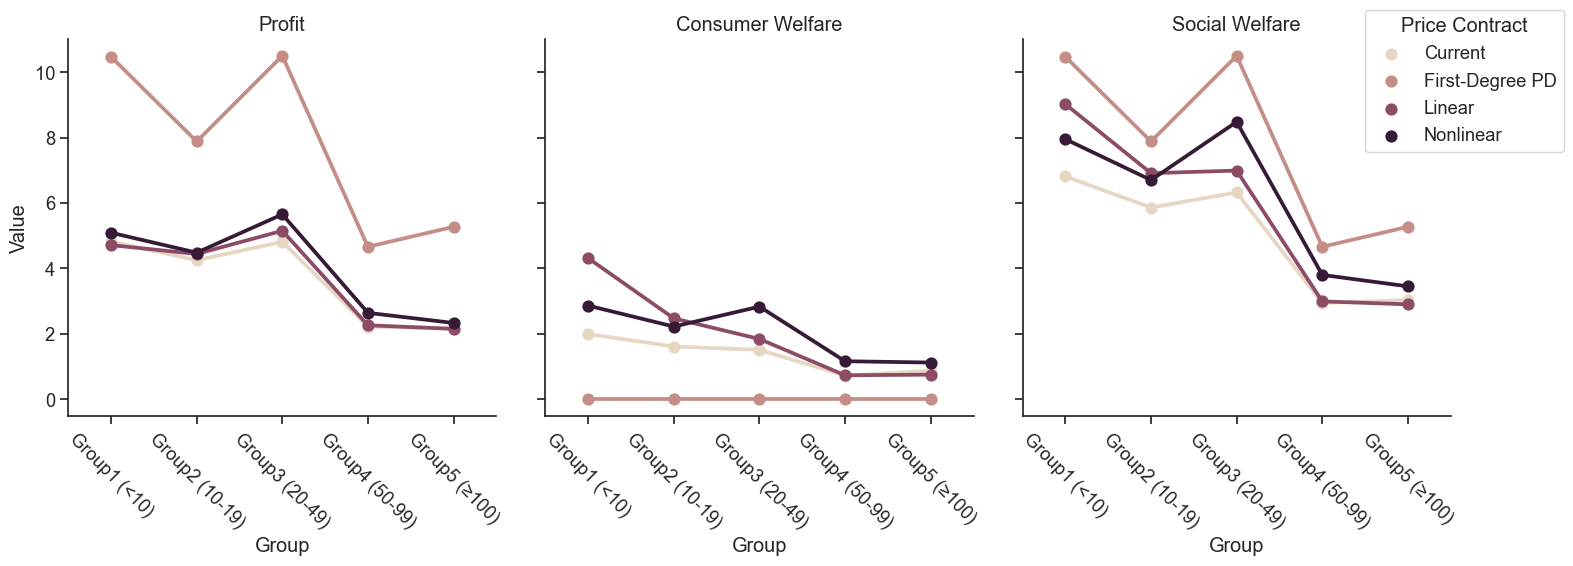

In [113]:
# Pointplot
point = (sns.catplot(data=welfare_df,
            x="Group", y="Value", hue="Method",
            col="Type", kind="point",
            palette="ch:.25",
            legend=False)
   .set_titles(col_template="{col_name}")
   .set_xticklabels(rotation=-45))

plt.legend(loc=(0.8, 0.7), title="Price Contract");

point.savefig("fig/groups_point.svg", dpi=400)

# Counterfactual (Dist.)

$Note: (f) -2\gamma_{med}, \gamma_{large}; (i) 2\gamma_{med}, -\gamma_{large}$

## Local VS Global

### Profit by Groups

In [2]:
profit_f = pd.DataFrame({"Group1 (<10)": {"Local": 5.11, "Global": 5.00},
              "Group2 (10-19)": {"Local": 4.54, "Global": 4.04},
              "Group3 (20-49)": {"Local": 9.40, "Global": 12.76},
              "Group4 (50-99)": {"Local": 2.52, "Global": 2.52},
              "Group5 (≥100)": {"Local": 2.21, "Global": 2.23}})
profit_f["Total"] = profit_f.sum(axis=1)
profit_f

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,5.11,4.54,9.40,2.52,2.21,23.78
Global,5.00,4.04,12.76,2.52,2.23,26.55


In [3]:
profit_i = pd.DataFrame({"Group1 (<10)": {"Local": 5.11, "Global": 5.11},
              "Group2 (10-19)": {"Local": 4.41, "Global": 4.51},
              "Group3 (20-49)": {"Local": 3.39, "Global": 1.54},
              "Group4 (50-99)": {"Local": 2.44, "Global": 5.18},
              "Group5 (≥100)": {"Local": 4.32, "Global": 5.02}})
profit_i["Total"] = profit_i.sum(axis=1)
profit_i

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,5.11,4.41,3.39,2.44,4.32,19.67
Global,5.11,4.51,1.54,5.18,5.02,21.36


In [6]:
print(pd.concat([profit_f, profit_i], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local  &          5.11 &          5.11 &            4.54 &            4.41 &            9.40 &            3.39 &            2.52 &            2.44 &           2.21 &           4.32 &  23.78 &  19.67 \\
Global &          5.00 &          5.11 &            4.04 &            4.51 &           12.76 &            1.54 &            2.52 &            5.18 &           2.23 &           5.02 &  26.55 &  21.36 \\
\bottomrule
\end{tabular}



C:\Users\wz369\AppData\Local\Temp\ipykernel_7564\1403626567.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([profit_f, profit_i], axis=1).sort_index(axis=1).to_latex())


### Consumer Welfare by Groups

In [7]:
cs_f = pd.DataFrame({"Group1 (<10)": {"Local": 2.86, "Global": 2.28},
              "Group2 (10-19)": {"Local": 2.20, "Global": 1.23},
              "Group3 (20-49)": {"Local": 8.54, "Global": 8.06},
              "Group4 (50-99)": {"Local": 1.16, "Global": 1.09},
              "Group5 (≥100)": {"Local": 0.98, "Global": 0.98}})
cs_f["Total"] = cs_f.sum(axis=1)
cs_f

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,2.86,2.20,8.54,1.16,0.98,15.74
Global,2.28,1.23,8.06,1.09,0.98,13.64


In [8]:
cs_i = pd.DataFrame({"Group1 (<10)": {"Local": 2.86, "Global": 2.85},
              "Group2 (10-19)": {"Local": 2.37, "Global": 2.37},
              "Group3 (20-49)": {"Local": 2.04, "Global": 0.42},
              "Group4 (50-99)": {"Local": 4.35, "Global": 2.82},
              "Group5 (≥100)": {"Local": 2.81, "Global": 2.68}})
cs_i["Total"] = cs_i.sum(axis=1)
cs_i

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,2.86,2.37,2.04,4.35,2.81,14.43
Global,2.85,2.37,0.42,2.82,2.68,11.14


In [11]:
print(pd.concat([cs_f, cs_i], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local  &          2.86 &          2.86 &            2.20 &            2.37 &            8.54 &            2.04 &            1.16 &            4.35 &           0.98 &           2.81 &  15.74 &  14.43 \\
Global &          2.28 &          2.85 &            1.23 &            2.37 &            8.06 &            0.42 &            1.09 &            2.82 &           0.98 &           2.68 &  13.64 &  11.14 \\
\bottomrule
\end{tabular}



C:\Users\wz369\AppData\Local\Temp\ipykernel_7564\1699107092.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([cs_f, cs_i], axis=1).sort_index(axis=1).to_latex())


### Social Welfare by Groups

In [12]:
sw_f = profit_f + cs_f
sw_f

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,7.97,6.74,17.94,3.68,3.19,39.52
Global,7.28,5.27,20.82,3.61,3.21,40.19


In [13]:
sw_i = profit_i + cs_i
sw_i

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,7.97,6.78,5.43,6.79,7.13,34.1
Global,7.96,6.88,1.96,8.00,7.70,32.5


In [16]:
print(pd.concat([sw_f, sw_i], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local  &          7.97 &          7.97 &            6.74 &            6.78 &           17.94 &            5.43 &            3.68 &            6.79 &           3.19 &           7.13 &  39.52 &   34.1 \\
Global &          7.28 &          7.96 &            5.27 &            6.88 &           20.82 &            1.96 &            3.61 &            8.00 &           3.21 &           7.70 &  40.19 &   32.5 \\
\bottomrule
\end{tabular}



C:\Users\wz369\AppData\Local\Temp\ipykernel_7564\2057224701.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([sw_f, sw_i], axis=1).sort_index(axis=1).to_latex())


### Graphs

In [17]:
figs = ["f", "i"]
for Type, dfs in {"Profit": [profit_f, profit_i],
                 "Consumer Welfare": [cs_f, cs_i],
                 "Social Welfare": [sw_f, sw_i]}.items():
    for i, df in enumerate(dfs):
        df.reset_index(names="Method", inplace=True)
        df["Type"] = Type
        df["Figure"] = figs[i]

# Create dataframe for visualization
welfare_fi = (pd.concat([profit_f, cs_f, sw_f, profit_i, cs_i, sw_i])
                .melt(id_vars=["Method", "Type", "Figure", "Total"],
                      var_name="Group",
                      value_name="Value"))
welfare_fi.head()

C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use 

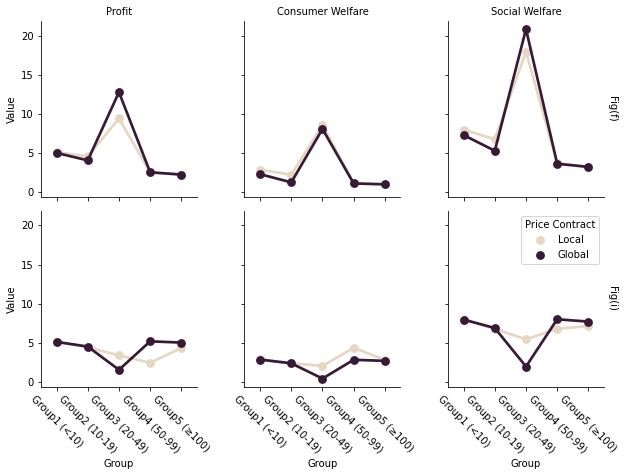

In [19]:
%matplotlib inline
# Pointplot
counter_fi = sns.FacetGrid(welfare_fi, row="Figure", col="Type", margin_titles=True)
counter_fi.map(sns.pointplot, "Group", "Value", "Method",
              palette="ch:.25",
              legend=False)

counter_fi.set_titles(col_template="{col_name}", row_template="Fig({row_name})")
counter_fi.set_xticklabels(rotation=-45)

plt.legend(title="Price Contract");

counter_fi.savefig("fig/counter_lc_vs_gb.svg", dpi=400)

## Comparison (3)

### Profit by Groups

In [42]:
profit_f3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 10.49, "Linear": 5.10, "Nonlinear": 5.00},
              "Group2 (10-19)": {"First-Degree PD": 7.87, "Linear": 4.45, "Nonlinear": 4.04},
              "Group3 (20-49)": {"First-Degree PD": 21.68, "Linear": 12.00, "Nonlinear": 12.76},
              "Group4 (50-99)": {"First-Degree PD": 4.63, "Linear": 1.83, "Nonlinear": 2.52},
              "Group5 (≥100)": {"First-Degree PD": 4.80, "Linear": 1.63, "Nonlinear": 2.23}})
profit_f3["Total"] = profit_f3.sum(axis=1)
profit_f3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,10.49,7.87,21.68,4.63,4.80,49.47
Linear,5.10,4.45,12.00,1.83,1.63,25.01
Nonlinear,5.00,4.04,12.76,2.52,2.23,26.55


In [44]:
profit_i3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 10.49, "Linear": 5.08, "Nonlinear": 5.11},
              "Group2 (10-19)": {"First-Degree PD": 7.87, "Linear": 4.48, "Nonlinear": 4.51},
              "Group3 (20-49)": {"First-Degree PD": 6.95, "Linear": 1.48, "Nonlinear": 1.54},
              "Group4 (50-99)": {"First-Degree PD": 8.57, "Linear": 5.09, "Nonlinear": 5.18},
              "Group5 (≥100)": {"First-Degree PD": 9.53, "Linear": 5.21, "Nonlinear": 5.02}})
profit_i3["Total"] = profit_i3.sum(axis=1)
profit_i3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,10.49,7.87,6.95,8.57,9.53,43.41
Linear,5.08,4.48,1.48,5.09,5.21,21.34
Nonlinear,5.11,4.51,1.54,5.18,5.02,21.36


In [45]:
print(pd.concat([profit_f3, profit_i3], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
First-Degree PD &         10.49 &         10.49 &            7.87 &            7.87 &           21.68 &            6.95 &            4.63 &            8.57 &           4.80 &           9.53 &  49.47 &  43.41 \\
Linear          &          5.10 &          5.08 &            4.45 &            4.48 &           12.00 &            1.48 &            1.83 &            5.09 &           1.63 &           5.21 &  25.01 &  21.34 \\
Nonlinear       &          5.00 &          5.11 &            4.04 &            4.51 &           12.76 &            1.54 &            2.52 &            5.18 &           2.23 &           5.02 &  26.55 &  21.36 \\
\bottomrule
\end{tabular}



C:\Users\wz369\AppData\Local\Temp\ipykernel_7564\2131471487.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([profit_f3, profit_i3], axis=1).sort_index(axis=1).to_latex())


### Consumer Welfare by Groups

In [43]:
cs_f3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 0, "Linear": 3.00, "Nonlinear": 2.28},
              "Group2 (10-19)": {"First-Degree PD": 0, "Linear": 1.71, "Nonlinear": 1.23},
              "Group3 (20-49)": {"First-Degree PD": 0, "Linear": 9.36, "Nonlinear": 8.06},
              "Group4 (50-99)": {"First-Degree PD": 0, "Linear": 0.42, "Nonlinear": 1.09},
              "Group5 (≥100)": {"First-Degree PD": 0, "Linear": 0.38, "Nonlinear": 0.98}})
cs_f3["Total"] = cs_f3.sum(axis=1)
cs_f3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,0.00,0.00,0.00,0.00,0.00,0.00
Linear,3.00,1.71,9.36,0.42,0.38,14.87
Nonlinear,2.28,1.23,8.06,1.09,0.98,13.64


In [46]:
cs_i3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 0, "Linear": 3.09, "Nonlinear": 2.85},
              "Group2 (10-19)": {"First-Degree PD": 0, "Linear": 1.76, "Nonlinear": 2.37},
              "Group3 (20-49)": {"First-Degree PD": 0, "Linear": 0.34, "Nonlinear": 0.42},
              "Group4 (50-99)": {"First-Degree PD": 0, "Linear": 3.13, "Nonlinear": 2.82},
              "Group5 (≥100)": {"First-Degree PD": 0, "Linear": 2.79, "Nonlinear": 2.68}})
cs_i3["Total"] = cs_i3.sum(axis=1)
cs_i3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,0.00,0.00,0.00,0.00,0.00,0.00
Linear,3.09,1.76,0.34,3.13,2.79,11.11
Nonlinear,2.85,2.37,0.42,2.82,2.68,11.14


In [47]:
print(pd.concat([cs_f3, cs_i3], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
First-Degree PD &          0.00 &          0.00 &            0.00 &            0.00 &            0.00 &            0.00 &            0.00 &            0.00 &           0.00 &           0.00 &   0.00 &   0.00 \\
Linear          &          3.00 &          3.09 &            1.71 &            1.76 &            9.36 &            0.34 &            0.42 &            3.13 &           0.38 &           2.79 &  14.87 &  11.11 \\
Nonlinear       &          2.28 &          2.85 &            1.23 &            2.37 &            8.06 &            0.42 &            1.09 &            2.82 &           0.98 &           2.68 &  13.64 &  11.14 \\
\bottomrule
\end{tabular}



C:\Users\wz369\AppData\Local\Temp\ipykernel_7564\3349353040.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([cs_f3, cs_i3], axis=1).sort_index(axis=1).to_latex())


### Social Welfare by Groups

In [48]:
sw_f3 = profit_f3 + cs_f3
sw_i3 = profit_i3 + cs_i3
print(pd.concat([sw_f3, sw_i3], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
First-Degree PD &         10.49 &         10.49 &            7.87 &            7.87 &           21.68 &            6.95 &            4.63 &            8.57 &           4.80 &           9.53 &  49.47 &  43.41 \\
Linear          &          8.10 &          8.17 &            6.16 &            6.24 &           21.36 &            1.82 &            2.25 &            8.22 &           2.01 &           8.00 &  39.88 &  32.45 \\
Nonlinear       &          7.28 &          7.96 &            5.27 &            6.88 &           20.82 &            1.96 &            3.61 &            8.00 &           3.21 &           7.70 &  40.19 &  32.50 \\
\bottomrule
\end{tabular}



C:\Users\wz369\AppData\Local\Temp\ipykernel_7564\1990454659.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([sw_f3, sw_i3], axis=1).sort_index(axis=1).to_latex())


### Graph

In [49]:
figs = ["f", "i"]
for Type, dfs in {"Profit": [profit_f3, profit_i3],
                 "Consumer Welfare": [cs_f3, cs_i3],
                 "Social Welfare": [sw_f3, sw_i3]}.items():
    for i, df in enumerate(dfs):
        df.reset_index(names="Method", inplace=True)
        df["Type"] = Type
        df["Figure"] = figs[i]

# Create dataframe for visualization
welfare_fi3 = (pd.concat([profit_f3, cs_f3, sw_f3, profit_i3, cs_i3, sw_i3])
                .melt(id_vars=["Method", "Type", "Figure", "Total"],
                      var_name="Group",
                      value_name="Value"))
welfare_fi3.head()

,Method,Type,Figure,Total,Group,Value
0,First-Degree PD,Profit,f,49.47,Group1 (<10),10.49
1,Linear,Profit,f,25.01,Group1 (<10),5.10
2,Nonlinear,Profit,f,26.55,Group1 (<10),5.00
3,First-Degree PD,Consumer Welfare,f,0.00,Group1 (<10),0.00
4,Linear,Consumer Welfare,f,14.87,Group1 (<10),3.00


C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\wz369\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use 

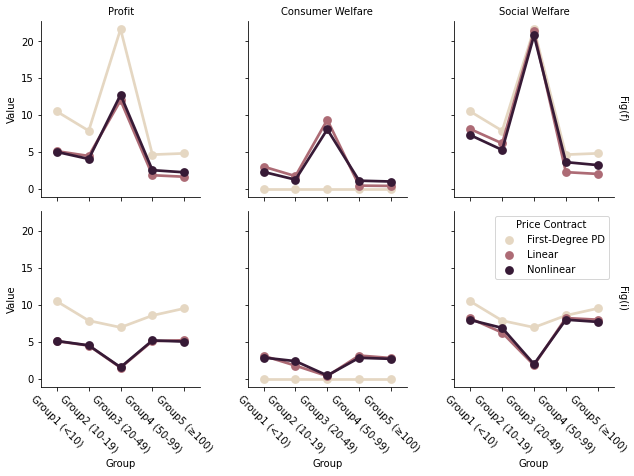

In [51]:
%matplotlib inline
# Pointplot
counter_fi3 = sns.FacetGrid(welfare_fi3, row="Figure", col="Type", margin_titles=True)
counter_fi3.map(sns.pointplot, "Group", "Value", "Method",
              palette="ch:.25",
              legend=False)

counter_fi3.set_titles(col_template="{col_name}", row_template="Fig({row_name})")
counter_fi3.set_xticklabels(rotation=-45)

plt.legend(title="Price Contract");

counter_fi3.savefig("fig/counter_comparison3.svg", dpi=400)